# 2일차: 세 가지 투자 전략 배우기 - 실습

## 학습 목표
- 모멘텀 전략: 12개월 수익률로 순위 매기기
- 단타 전략: RSI 신호 찾기
- 가치 전략: PER/PBR로 저평가 종목 찾기
- 포트폴리오 구성하기

## 1. 필요한 라이브러리와 데이터 준비

In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # MacOS용 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 불러오기 완료!")

라이브러리 불러오기 완료!


## 2. 더 많은 종목 데이터 가져오기 (KOSPI 주요 종목)

In [34]:
# KOSPI 주요 30개 종목
kospi_tickers = {
    "005930.KS": "삼성전자",
    "000660.KS": "SK하이닉스",
    "005380.KS": "현대차",
    "005490.KS": "POSCO홀딩스",
    "035420.KS": "NAVER",
    "000270.KS": "기아",
    "068270.KS": "셀트리온",
    "051910.KS": "LG화학",
    "035720.KS": "카카오",
    "105560.KS": "KB금융",
    "055550.KS": "신한지주",
    "096770.KS": "SK이노베이션",
    "003670.KS": "포스코퓨처엠",
    "006400.KS": "삼성SDI",
    "034730.KS": "SK",
    "032830.KS": "삼성생명",
    "015760.KS": "한국전력",
    "012330.KS": "현대모비스",
    "086790.KS": "하나금융지주",
    "066570.KS": "LG전자",
    "033780.KS": "KT&G",
    "017670.KS": "SK텔레콤",
    "010950.KS": "S-Oil",
    "316140.KS": "우리금융지주",
    "000810.KS": "삼성화재",
    "018260.KS": "삼성에스디에스",
    "011200.KS": "HMM",
    "009150.KS": "삼성전기",
    "036460.KS": "한국가스공사",
    "024110.KS": "기업은행"
}

# 데이터 수집 기간
start_date = "2021-01-01"
end_date = "2024-01-01"

In [35]:
print(f"총 {len(kospi_tickers)}개 종목 데이터 수집 시작...")
print("(시간이 조금 걸릴 수 있습니다)")

all_stock_data = {}

for ticker, name in kospi_tickers.items():
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        if len(data) > 0:
            all_stock_data[name] = data
            print(f"✓ {name}")
    except:
        print(f"✗ {name} - 데이터 수집 실패")

print(f"\n수집 완료: {len(all_stock_data)}개 종목")

총 30개 종목 데이터 수집 시작...
(시간이 조금 걸릴 수 있습니다)
✓ 삼성전자
✓ SK하이닉스
✓ 현대차
✓ POSCO홀딩스
✓ NAVER
✓ 기아
✓ 셀트리온
✓ LG화학
✓ 카카오
✓ KB금융
✓ 신한지주
✓ SK이노베이션
✓ 포스코퓨처엠
✓ 삼성SDI
✓ SK
✓ 삼성생명
✓ 한국전력
✓ 현대모비스
✓ 하나금융지주
✓ LG전자
✓ KT&G
✓ SK텔레콤
✓ S-Oil
✓ 우리금융지주
✓ 삼성화재
✓ 삼성에스디에스
✓ HMM
✓ 삼성전기
✓ 한국가스공사
✓ 기업은행

수집 완료: 30개 종목


## 3. 모멘텀 전략 실습

### 모멘텀 전략이란?
- "최근에 잘 올랐던 주식이 앞으로도 계속 오를 것"
- 12개월 수익률이 높은 종목에 투자
- 매월 리밸런싱 (종목 교체)

In [36]:
# 모든 종목의 종가 데이터 모으기
price_data = pd.DataFrame()

for name, data in all_stock_data.items():
    price_data[name] = data['Close']

# 결측치 처리 (앞의 값으로 채우기)
price_data = price_data.fillna(method='ffill')

print(f"데이터 shape: {price_data.shape}")
print(f"기간: {price_data.index[0]} ~ {price_data.index[-1]}")

데이터 shape: (737, 30)
기간: 2021-01-04 00:00:00 ~ 2023-12-28 00:00:00


### 3-1. 12개월 수익률 계산

In [37]:
# 12개월(252 거래일) 수익률 계산
def calculate_momentum(prices, lookback_days=252):
    """모멘텀 (과거 수익률) 계산"""
    return prices.pct_change(periods=lookback_days)

# 12개월 모멘텀 계산
momentum_12m = calculate_momentum(price_data, 252)

# 가장 최근 날짜의 모멘텀
latest_date = momentum_12m.index[-1]
latest_momentum = momentum_12m.loc[latest_date].dropna()

print(f"\n{latest_date.strftime('%Y-%m-%d')} 기준 12개월 수익률")
print("=" * 50)


2023-12-28 기준 12개월 수익률


### 3-2. 모멘텀 순위 매기기

모멘텀 순위 (12개월 수익률 기준)
--------------------------------------------------
     종목명  12개월_수익률  순위
  포스코퓨처엠     90.75   1
  SK하이닉스     83.39   2
POSCO홀딩스     82.32   3
      기아     69.51   4
 삼성에스디에스     43.40   5
    삼성전자     37.61   6
     현대차     36.79   7
    삼성화재     30.19   8
   NAVER     24.84   9
    LG전자     20.13  10


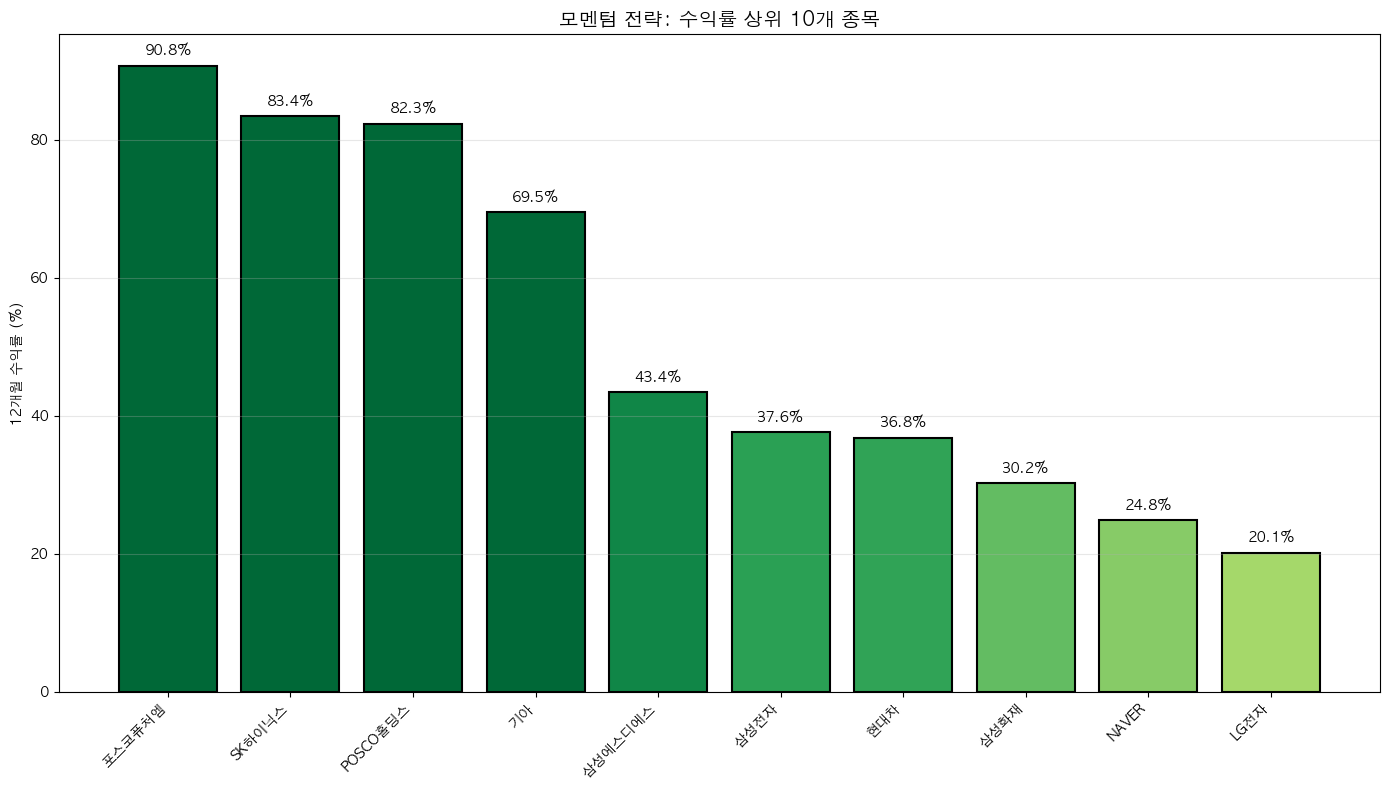

In [38]:
# 순위 매기기 (높은 수익률이 1위)
momentum_rank = latest_momentum.sort_values(ascending=False)

# DataFrame으로 정리
momentum_df = pd.DataFrame({
    '종목명': momentum_rank.index,
    '12개월_수익률': (momentum_rank.values * 100).round(2),
    '순위': range(1, len(momentum_rank) + 1)
})

print("모멘텀 순위 (12개월 수익률 기준)")
print("-" * 50)
print(momentum_df.head(10).to_string(index=False))

# 시각화
plt.figure(figsize=(14, 8))
top10 = momentum_df.head(10)
colors = plt.cm.RdYlGn(top10['12개월_수익률'] / 100 + 0.5)  # 수익률에 따라 색상 변경

bars = plt.bar(range(len(top10)), top10['12개월_수익률'], color=colors, edgecolor='black', linewidth=1.5)
plt.xticks(range(len(top10)), top10['종목명'], rotation=45, ha='right')
plt.ylabel('12개월 수익률 (%)')
plt.title('모멘텀 전략: 수익률 상위 10개 종목', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='y')

# 각 막대에 수익률 표시
for i, (bar, val) in enumerate(zip(bars, top10['12개월_수익률'])):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 3-3. 모멘텀 포트폴리오 구성


모멘텀 포트폴리오 (상위 5개 종목, 동일가중)
1위: 포스코퓨처엠          | 수익률: +90.75% | 투자비중: 20%
2위: SK하이닉스          | 수익률: +83.39% | 투자비중: 20%
3위: POSCO홀딩스        | 수익률: +82.32% | 투자비중: 20%
4위: 기아              | 수익률: +69.51% | 투자비중: 20%
5위: 삼성에스디에스         | 수익률: +43.40% | 투자비중: 20%


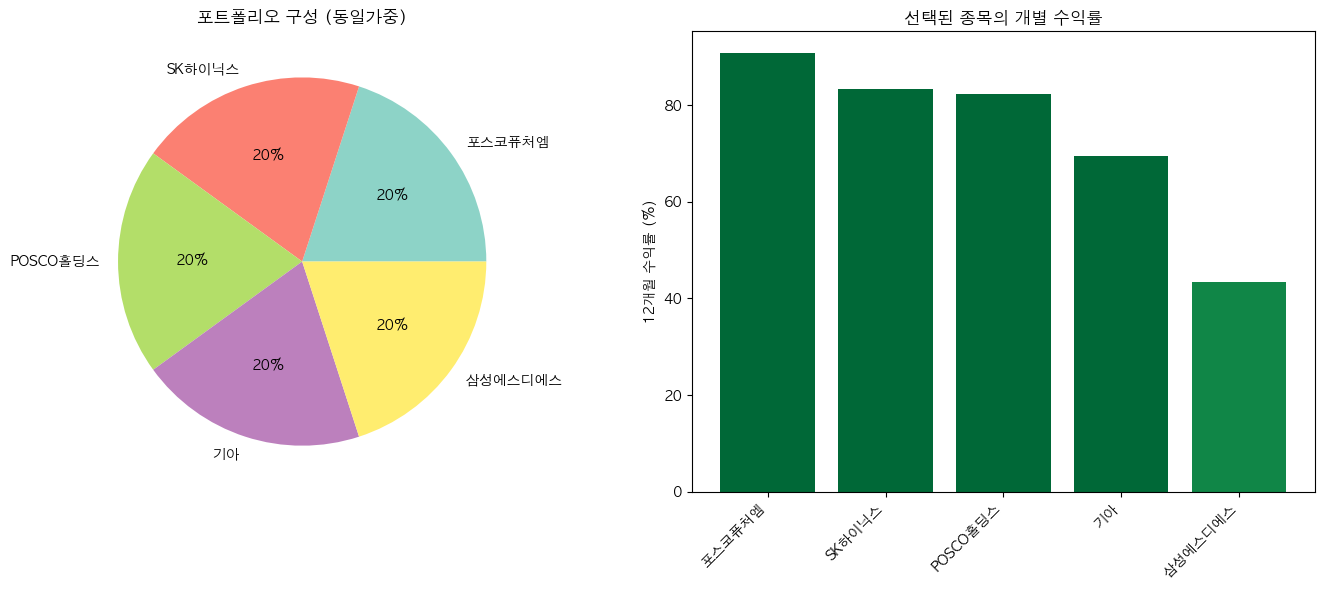

In [39]:
# 상위 5개 종목으로 포트폴리오 구성
portfolio_size = 5
momentum_portfolio = momentum_df.head(portfolio_size)

# 동일 가중 (각 종목 20%)
momentum_portfolio['투자비중'] = 100 / portfolio_size

print("\n모멘텀 포트폴리오 (상위 5개 종목, 동일가중)")
print("=" * 60)
for _, row in momentum_portfolio.iterrows():
    print(f"{row['순위']}위: {row['종목명']:15s} | 수익률: {row['12개월_수익률']:+6.2f}% | 투자비중: {row['투자비중']:.0f}%")

# 파이 차트로 포트폴리오 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 투자 비중
ax1.pie(momentum_portfolio['투자비중'], 
        labels=momentum_portfolio['종목명'], 
        autopct='%1.0f%%',
        colors=plt.cm.Set3(np.linspace(0, 1, portfolio_size)))
ax1.set_title('포트폴리오 구성 (동일가중)', fontsize=12)

# 각 종목의 기여도
ax2.bar(momentum_portfolio['종목명'], momentum_portfolio['12개월_수익률'],
        color=plt.cm.RdYlGn(momentum_portfolio['12개월_수익률'] / 100 + 0.5))
ax2.set_ylabel('12개월 수익률 (%)')
ax2.set_title('선택된 종목의 개별 수익률', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 4. 단타 전략 실습

### 단타 전략이란?
- RSI를 이용한 단기 매매
- RSI < 30: 과매도 → 매수 신호
- RSI > 70: 과매수 → 매도 신호

In [40]:
def calculate_rsi(prices, period=14):
    """RSI 계산"""
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# 모든 종목의 RSI 계산
rsi_data = pd.DataFrame()
for col in price_data.columns:
    rsi_data[col] = calculate_rsi(price_data[col])

# 최근 RSI 값
latest_rsi = rsi_data.iloc[-1].dropna()

print("현재 RSI 상태")
print("=" * 50)

현재 RSI 상태


### 4-1. RSI 신호 찾기

In [41]:
# 과매도 종목 (RSI < 30)
oversold = latest_rsi[latest_rsi < 30].sort_values()

# 과매수 종목 (RSI > 70)  
overbought = latest_rsi[latest_rsi > 70].sort_values(ascending=False)

print(f"과매도 종목 (RSI < 30) - 매수 고려")
print("-" * 40)
if len(oversold) > 0:
    for name, rsi in oversold.items():
        print(f"  {name:15s} RSI: {rsi:.2f}")
else:
    print("  현재 과매도 종목 없음")

print(f"\n과매수 종목 (RSI > 70) - 매도 고려")
print("-" * 40)
if len(overbought) > 0:
    for name, rsi in overbought.items():
        print(f"  {name:15s} RSI: {rsi:.2f}")
else:
    print("  현재 과매수 종목 없음")

과매도 종목 (RSI < 30) - 매수 고려
----------------------------------------
  한국가스공사          RSI: 20.00

과매수 종목 (RSI > 70) - 매도 고려
----------------------------------------
  기아              RSI: 98.06
  현대차             RSI: 90.35
  SK하이닉스          RSI: 90.10
  삼성전자            RSI: 88.51
  S-Oil           RSI: 86.74
  신한지주            RSI: 79.69
  삼성생명            RSI: 79.00
  LG전자            RSI: 78.78
  셀트리온            RSI: 76.76
  현대모비스           RSI: 71.19


### 4-2. RSI 분포 시각화

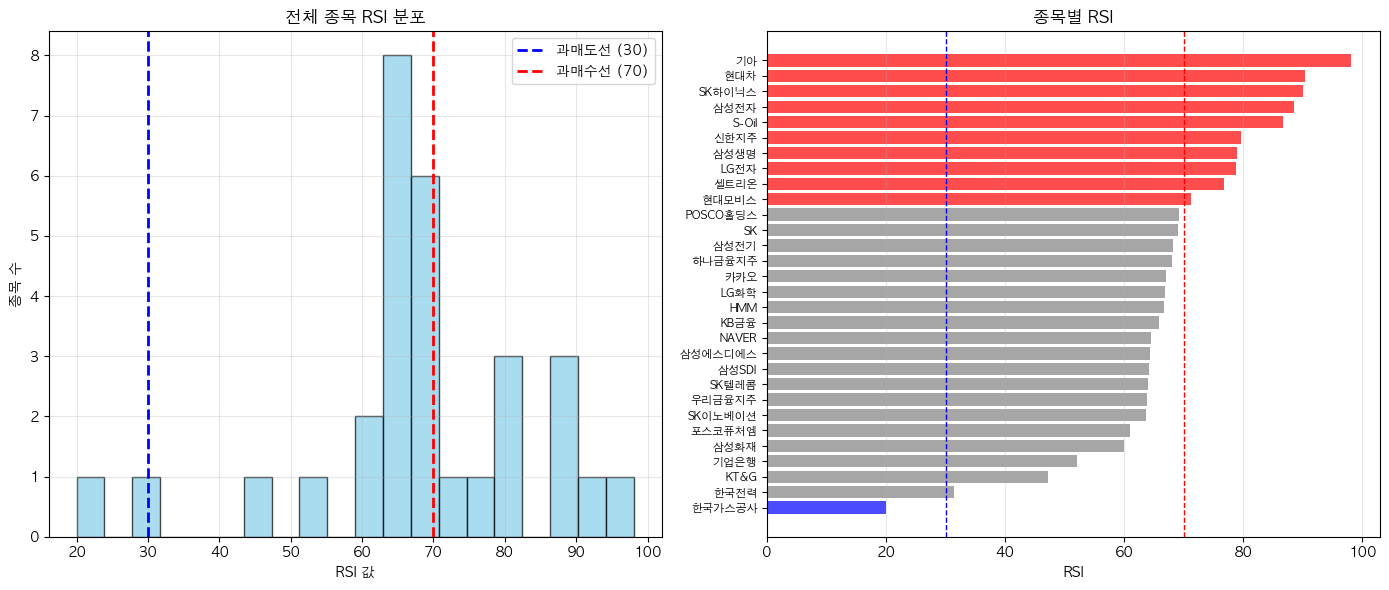

In [42]:
# RSI 분포
plt.figure(figsize=(14, 6))

# 히스토그램
plt.subplot(1, 2, 1)
plt.hist(latest_rsi, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=30, color='blue', linestyle='--', linewidth=2, label='과매도선 (30)')
plt.axvline(x=70, color='red', linestyle='--', linewidth=2, label='과매수선 (70)')
plt.xlabel('RSI 값')
plt.ylabel('종목 수')
plt.title('전체 종목 RSI 분포', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# RSI별 종목
plt.subplot(1, 2, 2)
sorted_rsi = latest_rsi.sort_values()
colors = ['blue' if x < 30 else 'red' if x > 70 else 'gray' for x in sorted_rsi]
plt.barh(range(len(sorted_rsi)), sorted_rsi, color=colors, alpha=0.7)
plt.axvline(x=30, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=70, color='red', linestyle='--', linewidth=1)
plt.yticks(range(len(sorted_rsi)), sorted_rsi.index, fontsize=8)
plt.xlabel('RSI')
plt.title('종목별 RSI', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### 4-3. 특정 종목의 RSI 추이와 매매 신호

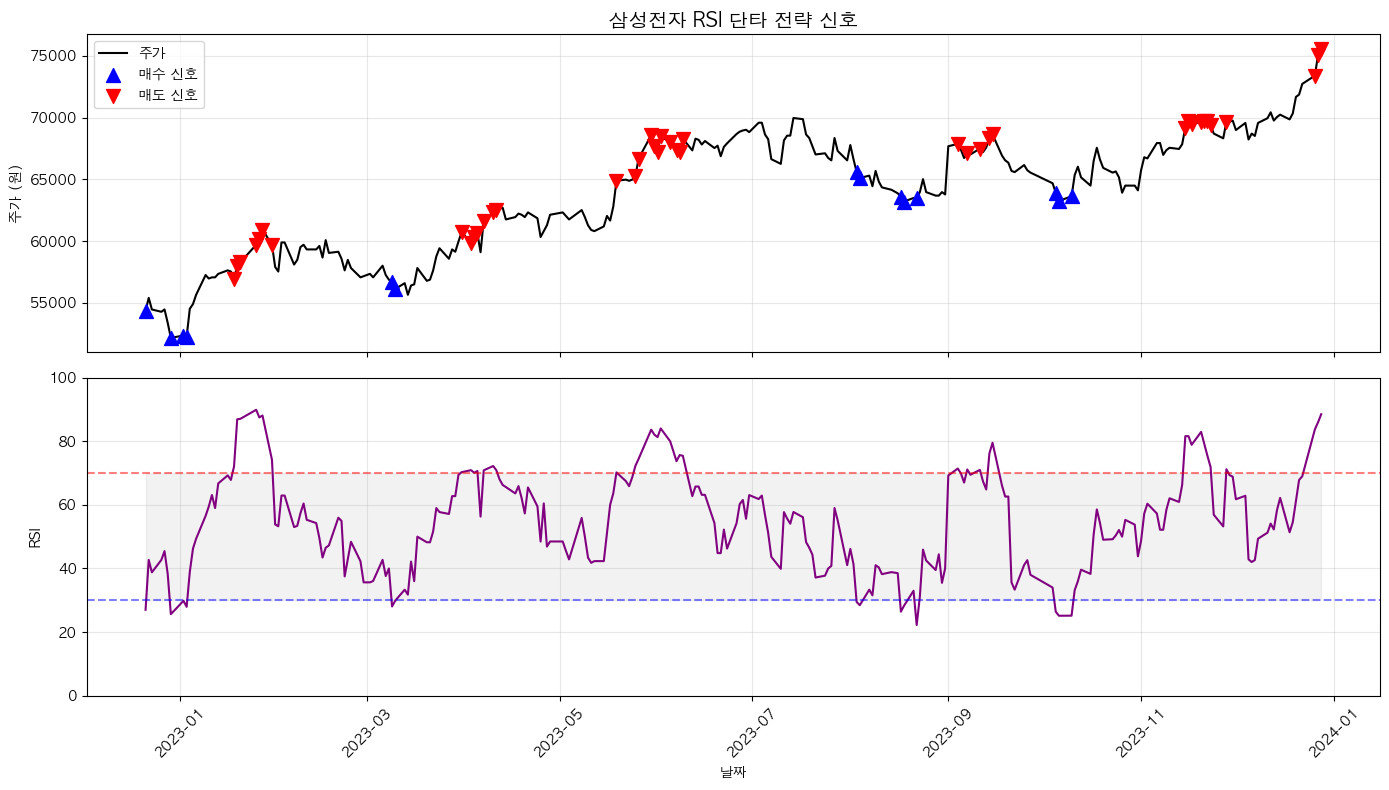


삼성전자 RSI 전략 통계 (최근 1년)
----------------------------------------
매수 신호 발생: 14회
매도 신호 발생: 41회


In [43]:
# 삼성전자로 예시
stock_name = "삼성전자"
if stock_name in price_data.columns:
    # 최근 1년 데이터
    recent_prices = price_data[stock_name].iloc[-252:]
    recent_rsi = rsi_data[stock_name].iloc[-252:]
    
    # 매매 신호 생성
    buy_signals = recent_rsi < 30
    sell_signals = recent_rsi > 70
    
    # 시각화
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
    
    # 주가
    ax1.plot(recent_prices.index, recent_prices, color='black', linewidth=1.5, label='주가')
    
    # 매수 신호
    buy_points = recent_prices[buy_signals]
    ax1.scatter(buy_points.index, buy_points, color='blue', marker='^', s=100, label='매수 신호', zorder=5)
    
    # 매도 신호
    sell_points = recent_prices[sell_signals]
    ax1.scatter(sell_points.index, sell_points, color='red', marker='v', s=100, label='매도 신호', zorder=5)
    
    ax1.set_ylabel('주가 (원)')
    ax1.set_title(f'{stock_name} RSI 단타 전략 신호', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # RSI
    ax2.plot(recent_rsi.index, recent_rsi, color='purple', linewidth=1.5)
    ax2.axhline(y=70, color='red', linestyle='--', alpha=0.5)
    ax2.axhline(y=30, color='blue', linestyle='--', alpha=0.5)
    ax2.fill_between(recent_rsi.index, 30, 70, alpha=0.1, color='gray')
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('날짜')
    ax2.set_ylim(0, 100)
    ax2.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 신호 통계
    print(f"\n{stock_name} RSI 전략 통계 (최근 1년)")
    print("-" * 40)
    print(f"매수 신호 발생: {buy_signals.sum()}회")
    print(f"매도 신호 발생: {sell_signals.sum()}회")

## 5. 가치 전략 실습

### 가치 전략이란?

- 기업 가치 대비 주가가 싼 종목에 투자

#### EPS VS BPS

- 주당순이익(EPS, Earnings Per Share)
  - $\displaystyle \frac{순이익}{발행주식수}$
  - 보통주 기준

- 주당순자산(BPS, Book Value Per Share)
  - $\displaystyle \frac{순자산(자기자본)}{발행주식수}$

#### EPS

- current EPS : 최근 회계년도 순이익 기준
- trailing EPS : 바로 직전 12개월
- forward EPS : 향후 12개월
- PER 은 이익대비 이다보니, 기간을 정해서 계산

#### PER

- trailingPE : 과거 실적 기준 P/E (PER)
  - 바로 직전 12개월(TTM : trailing 12 months)
  - $\displaystyle \frac{현재주가}{바로 직전 12개월 기준 EPS}$

- forwardPE : 미래 예상 실적 기준 P/E (Forward PER)

- 1 주당 순이익이 1000원 일때, PER 이 10 이라면, 순이익의 10 배가 현재 주식가격

- PER (주가수익비율): 낮을수록 저평가
  - Price on Earning Ration
  - Price-To-Earning Ratio
  - 주가가 주당순이익의 몇배가 되는지

#### PBR

- PBR (주가순자산비율): 낮을수록 저평가

  - Price-To-Book Ratio

  - $\displaystyle \frac{Market Price per Share}{Book Value per Share}=\frac{주당\ 시장가격}{주당\ 장부가치}$
  - $\displaystyle 주당 장부가치 = \frac{자산 - 부채}{발행주식수}$
  - PBR = 1 : 순자산(자기자본) == 시가총액(시총)

- 1 주당 순자산이 1000원 일때, PBR 이 2 라면, 순자산의 2 배가 현재 주식가격
  - 해당 기업의 최신 분기말 기준 또는 재무제표 결산일 기준

#### etc.

  - NCAV per share(주당 순유동자산)
    - Net Current Asset Value
    
  - Net Cash per share(주당 순현금)
    - $\displaystyle \frac{현금+단기금융자산-총차입금}{발행주식수}$

In [44]:
yf.__version__

'0.2.66'

In [45]:
# 재무 데이터 가져오기 (yfinance의 info 사용)
print("재무 데이터 수집 중... (시간이 걸릴 수 있습니다)")

financial_data = []

for ticker, name in list(kospi_tickers.items())[:15]:  # 시간 절약을 위해 15개만
    try:
        stock = yf.Ticker(ticker)
        info = stock.get_info()
        
        # 현재 주가
        price = info.get('currentPrice', None)
        if price is None:
            price = info.get('regularMarketPrice', None)
        
        # PER 데이터 추출
        per = info.get('trailingPE', None)
        market_cap = info.get('marketCap', None)

        # PER이 없으면 직접 계산 시도
        if per in (None, 0):
            # EPS = 순이익 / 발행주식수
            net_income = info.get("netIncomeToCommon")   # 지배주주 귀속 순이익 (TTM일 가능성 큼)
            shares_out = info.get("sharesOutstanding")   # 발행주식수

            eps = None

            if net_income is not None and shares_out not in (None, 0):
                eps = net_income / shares_out

                # PER = 주가 / EPS
                if price is not None and eps != 0:
                    per = price / eps
        
        # 데이터가 유효한 경우만 추가
        if per is not None and per > 0:
            financial_data.append({
                '종목명': name,
                'PER': per,
                '시가총액': market_cap / 1e12 if market_cap else None  # 조 단위
            })
            print(f"✓ {name} - PER: {per:.2f}")
        else:
            print(f"✗ {name} - PER 데이터 없음")
    except Exception as e:
        print(f"✗ {name} - 오류: {str(e)[:50]}")

print(f"\n수집된 데이터: {len(financial_data)}개")

# DataFrame 생성
financial_df = pd.DataFrame(financial_data)

# PER이 양수이고 합리적인 범위 내의 종목만 (적자 기업 및 이상치 제외)
if len(financial_df) > 0:
    print(f"DataFrame 생성 완료: {len(financial_df)}개 종목")
    financial_df = financial_df[(financial_df['PER'] > 0) & (financial_df['PER'] < 100)]
    print(f"유효한 재무 데이터: {len(financial_df)}개 종목")
else:
    print("⚠️ 경고: 재무 데이터를 가져올 수 없습니다.")
    print("yfinance API 제한이나 네트워크 문제일 수 있습니다.")
    print("잠시 후 다시 시도해주세요.")

재무 데이터 수집 중... (시간이 걸릴 수 있습니다)
✓ 삼성전자 - PER: 21.33
✓ SK하이닉스 - PER: 10.85
✓ 현대차 - PER: 6.21
✓ POSCO홀딩스 - PER: 49.49
✓ NAVER - PER: 16.10
✓ 기아 - PER: 5.91
✓ 셀트리온 - PER: 53.88
✗ LG화학 - PER 데이터 없음
✓ 카카오 - PER: 109.92
✓ KB금융 - PER: 8.07
✓ 신한지주 - PER: 8.00
✗ SK이노베이션 - PER 데이터 없음
✗ 포스코퓨처엠 - PER 데이터 없음
✗ 삼성SDI - PER 데이터 없음
✗ SK - PER 데이터 없음

수집된 데이터: 10개
DataFrame 생성 완료: 10개 종목
유효한 재무 데이터: 9개 종목


### 5-1. PER 기준 저평가 종목 찾기

In [46]:
# PER 순위 (낮을수록 저평가)
if len(financial_df) > 0:
    per_rank = financial_df.sort_values('PER')

    print("PER 기준 저평가 종목 TOP 10")
    print("=" * 50)
    for i, row in per_rank.head(10).iterrows():
        print(f"{row['종목명']:15s} | PER: {row['PER']:6.2f} | 시가총액: {row['시가총액']:.2f}조원")
else:
    print("재무 데이터가 없습니다. 이전 셀을 다시 실행해주세요.")

PER 기준 저평가 종목 TOP 10
기아              | PER:   5.91 | 시가총액: 46.28조원
현대차             | PER:   6.21 | 시가총액: 73.53조원
신한지주            | PER:   8.00 | 시가총액: 37.37조원
KB금융            | PER:   8.07 | 시가총액: 45.20조원
SK하이닉스          | PER:  10.85 | 시가총액: 387.35조원
NAVER           | PER:  16.10 | 시가총액: 34.98조원
삼성전자            | PER:  21.33 | 시가총액: 716.75조원
POSCO홀딩스        | PER:  49.49 | 시가총액: 22.50조원
셀트리온            | PER:  53.88 | 시가총액: 39.75조원


### 5-2. PER 시각화

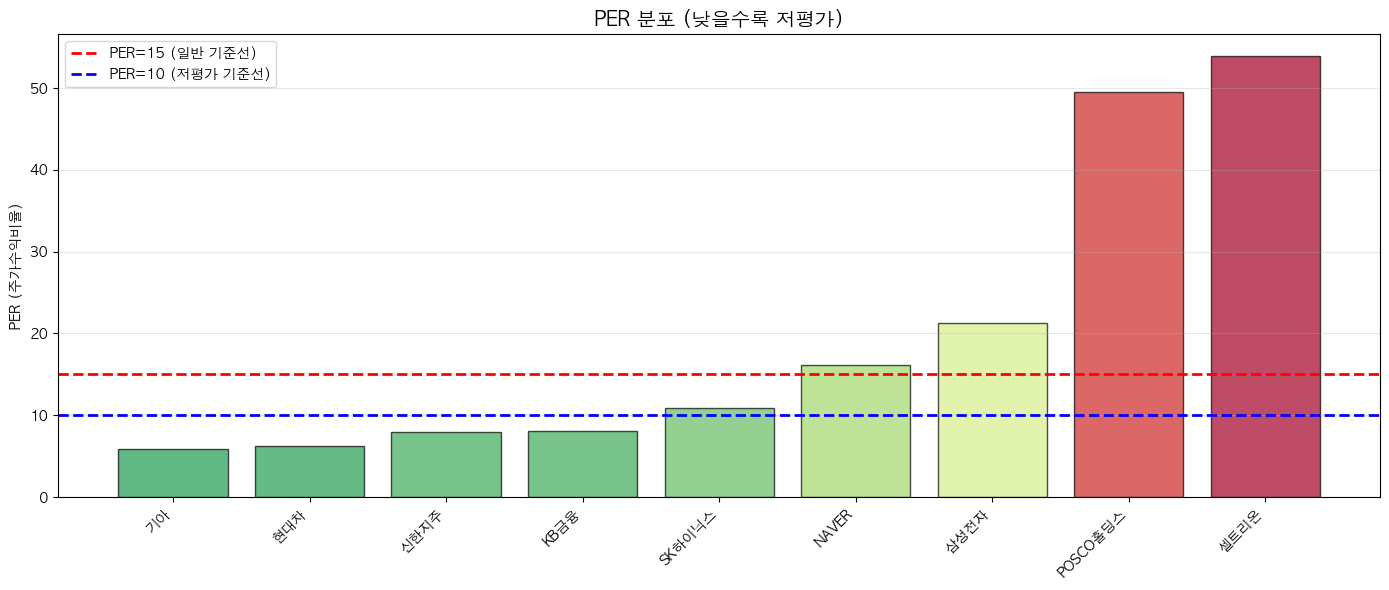

In [47]:
# PER 분포 시각화
if len(financial_df) > 0:
    plt.figure(figsize=(14, 6))
    
    # 막대 그래프
    sorted_per = financial_df.sort_values('PER')
    colors = plt.cm.RdYlGn_r(sorted_per['PER'] / sorted_per['PER'].max())
    
    plt.bar(range(len(sorted_per)), sorted_per['PER'], color=colors, edgecolor='black', alpha=0.7)
    plt.xticks(range(len(sorted_per)), sorted_per['종목명'], rotation=45, ha='right')
    plt.ylabel('PER (주가수익비율)')
    plt.title('PER 분포 (낮을수록 저평가)', fontsize=14, fontweight='bold')
    plt.axhline(y=15, color='red', linestyle='--', linewidth=2, label='PER=15 (일반 기준선)')
    plt.axhline(y=10, color='blue', linestyle='--', linewidth=2, label='PER=10 (저평가 기준선)')
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("재무 데이터가 없습니다. 이전 셀을 다시 실행해주세요.")

### 5-3. PER vs 시가총액 산점도

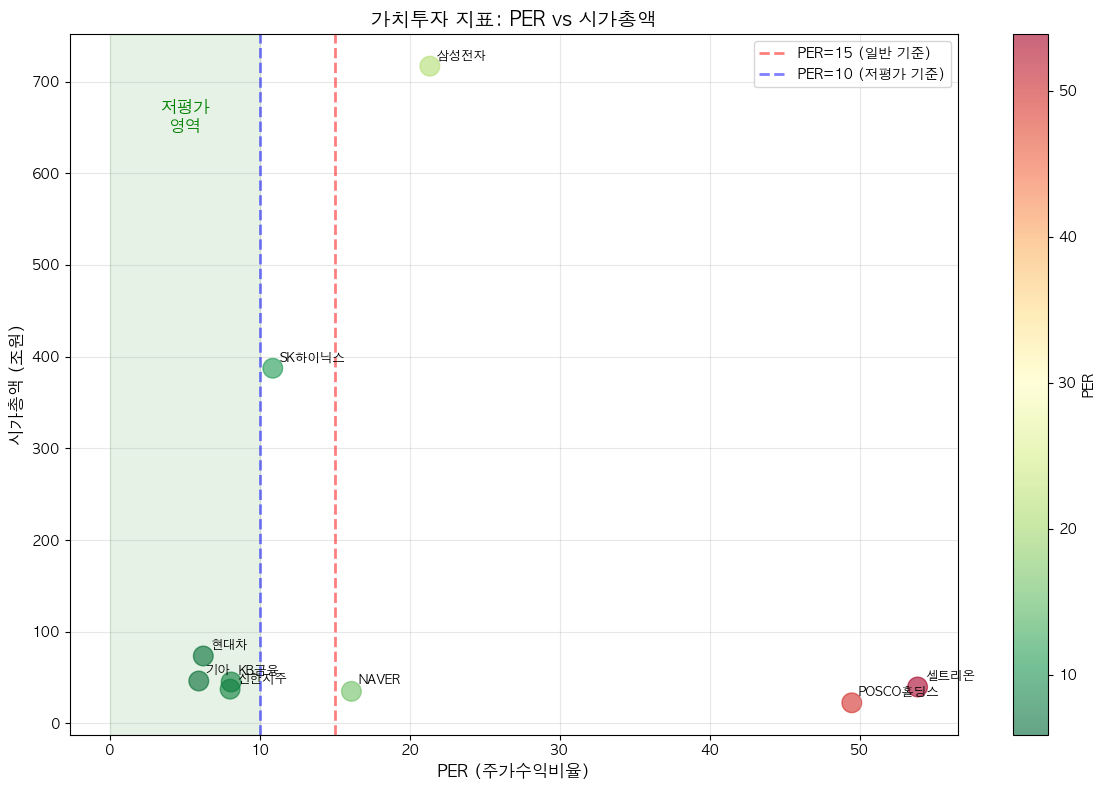

In [48]:
if len(financial_df) > 0:
    plt.figure(figsize=(12, 8))

    # 산점도 (PER vs 시가총액)
    scatter = plt.scatter(financial_df['PER'], financial_df['시가총액'], 
                         s=200,  # 고정 크기
                         alpha=0.6, 
                         c=financial_df['PER'],
                         cmap='RdYlGn_r')  # PER이 낮을수록 녹색

    # 컬러바 추가
    plt.colorbar(scatter, label='PER')

    # 종목명 표시
    for i, row in financial_df.iterrows():
        plt.annotate(row['종목명'], 
                    (row['PER'], row['시가총액']),
                    fontsize=9,
                    xytext=(5, 5),
                    textcoords='offset points')

    # 기준선
    plt.axvline(x=15, color='red', linestyle='--', alpha=0.5, linewidth=2, label='PER=15 (일반 기준)')
    plt.axvline(x=10, color='blue', linestyle='--', alpha=0.5, linewidth=2, label='PER=10 (저평가 기준)')

    # 저평가 영역 표시
    plt.axvspan(0, 10, alpha=0.1, color='green')

    plt.xlabel('PER (주가수익비율)', fontsize=12)
    plt.ylabel('시가총액 (조원)', fontsize=12)
    plt.title('가치투자 지표: PER vs 시가총액', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 텍스트 추가
    plt.text(5, financial_df['시가총액'].max()*0.9, '저평가\n영역', 
             fontsize=12, color='green', fontweight='bold', ha='center')

    plt.tight_layout()
    plt.show()

else:    print("재무 데이터가 없어 시각화를 건너뜁니다.")

### 5-4. 가치 포트폴리오 구성


가치 투자 포트폴리오 (PER 기준 상위 5개)
1위: 기아              | PER:   5.91 | 시가총액: 46.28조원 | 투자비중: 20%
2위: 현대차             | PER:   6.21 | 시가총액: 73.53조원 | 투자비중: 20%
3위: 신한지주            | PER:   8.00 | 시가총액: 37.37조원 | 투자비중: 20%
4위: KB금융            | PER:   8.07 | 시가총액: 45.20조원 | 투자비중: 20%
5위: SK하이닉스          | PER:  10.85 | 시가총액: 387.35조원 | 투자비중: 20%


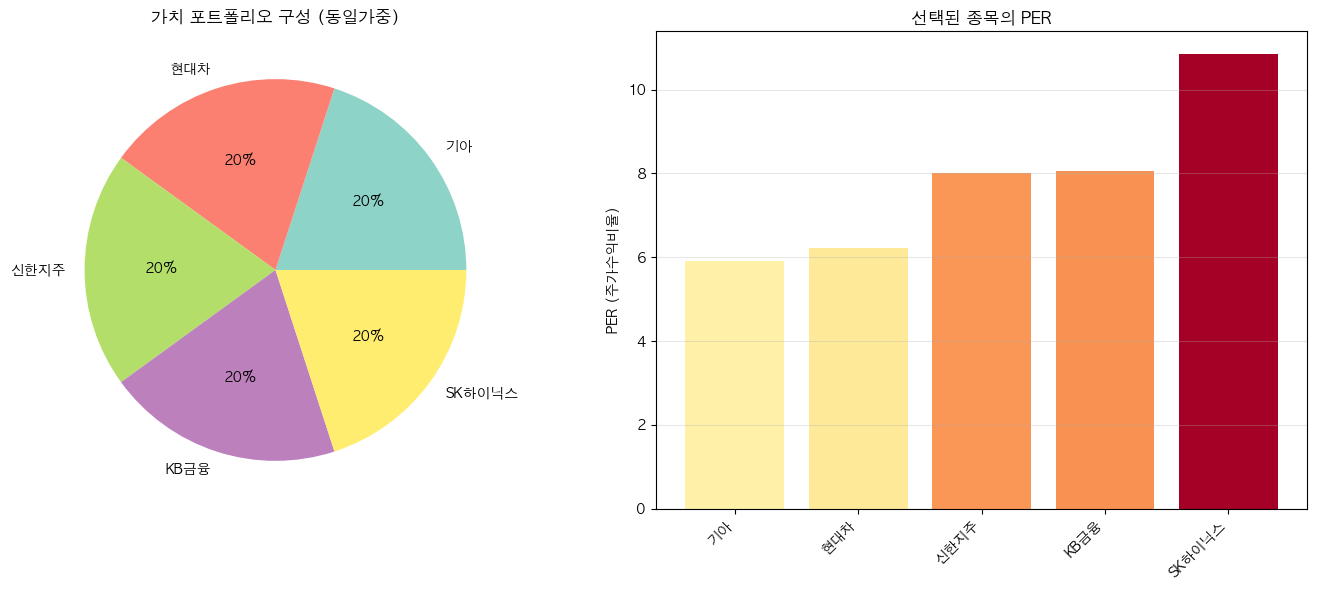

In [49]:
# PER 기준으로 저평가 종목 선정
if len(financial_df) > 0:
    # PER 낮은 순으로 정렬하여 상위 5개 선정
    value_portfolio = financial_df.sort_values('PER').head(5).copy()
    
    # 동일 가중 투자
    value_portfolio['투자비중'] = 100 / len(value_portfolio)

    print("\n가치 투자 포트폴리오 (PER 기준 상위 5개)")
    print("=" * 70)
    for idx, (i, row) in enumerate(value_portfolio.iterrows(), 1):
        print(f"{idx}위: {row['종목명']:15s} | PER: {row['PER']:6.2f} | 시가총액: {row['시가총액']:5.2f}조원 | 투자비중: {row['투자비중']:.0f}%")
    
    # 시각화
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # 투자 비중 파이 차트
    ax1.pie(value_portfolio['투자비중'], 
            labels=value_portfolio['종목명'], 
            autopct='%1.0f%%',
            colors=plt.cm.Set3(np.linspace(0, 1, len(value_portfolio))))
    ax1.set_title('가치 포트폴리오 구성 (동일가중)', fontsize=12)
    
    # PER 막대 그래프
    ax2.bar(value_portfolio['종목명'], value_portfolio['PER'],
            color=plt.cm.RdYlGn_r(value_portfolio['PER'] / value_portfolio['PER'].max()))
    ax2.set_ylabel('PER (주가수익비율)')
    ax2.set_title('선택된 종목의 PER', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
else:
    print("재무 데이터가 없어 포트폴리오를 구성할 수 없습니다.")
    value_portfolio = pd.DataFrame()  # 빈 DataFrame 생성

## 6. 전략 비교: 모멘텀 vs 가치

### 두 전략의 차이점

In [50]:
# 전략 비교 테이블
comparison = pd.DataFrame({
    '구분': ['투자 철학', '종목 선정', '리밸런싱 주기', '장점', '단점'],
    '모멘텀 전략': [
        '추세 추종 (오른 것이 계속 오른다)',
        '12개월 수익률 상위',
        '매월',
        '상승장에서 높은 수익',
        '하락장에서 큰 손실'
    ],
    '가치 전략': [
        '저평가 매수 (싼 것을 산다)',
        'PER/PBR 하위',
        '분기/반기',
        '장기적으로 안정적',
        '상승이 느림'
    ]
})

print("전략 비교")
print("=" * 70)
for _, row in comparison.iterrows():
    print(f"{row['구분']:15s} | 모멘텀: {row['모멘텀 전략']:25s} | 가치: {row['가치 전략']}")

전략 비교
투자 철학           | 모멘텀: 추세 추종 (오른 것이 계속 오른다)      | 가치: 저평가 매수 (싼 것을 산다)
종목 선정           | 모멘텀: 12개월 수익률 상위               | 가치: PER/PBR 하위
리밸런싱 주기         | 모멘텀: 매월                        | 가치: 분기/반기
장점              | 모멘텀: 상승장에서 높은 수익               | 가치: 장기적으로 안정적
단점              | 모멘텀: 하락장에서 큰 손실                | 가치: 상승이 느림


## 7. 포트폴리오 시뮬레이션

### 간단한 백테스트 (모멘텀 전략)

In [51]:
%%time
# 월별 리밸런싱 시뮬레이션
def simple_momentum_backtest(prices, top_n=5, lookback=252, initial_value=1_000_000):
    """간단한 모멘텀 백테스트"""
    
    # 월말 날짜만 선택
    monthly_dates = prices.resample('M').last().index
    
    portfolio_values = []
    holdings = None
    portfolio_value = initial_value
    
    for i, date in enumerate(monthly_dates[12:]):  # 12개월 후부터 시작 (lookback 필요)
        if len(prices.loc[:date]) <= lookback:
            continue  # lookback 기간이 모자라면 건너뜀

        current_prices = prices.loc[:date].iloc[-1]         # 현재(해당 월말) 가격
        past_prices = prices.loc[:date].iloc[-(lookback+1)] # lookback 이전 가격

        # 12개월 모멘텀 계산
        momentum = (current_prices / past_prices - 1).dropna()
        
        # 상위 N개 선택
        top_stocks = momentum.nlargest(top_n).index
        current_top_prices = current_prices[top_stocks]
        
        # 포트폴리오 가치 계산
        if holdings is None:
            # ---------- 초기 매수 ----------
            cash_per_stock = initial_value / top_n
            holdings = {
                stock: cash_per_stock / current_top_prices[stock]  # 보유 주식 수
                for stock in top_stocks
            }
        else:
            # ---------- 기존 포트폴리오 평가(마크투마켓) ----------
            portfolio_value = sum(
                holdings[s] * current_prices[s]
                for s in holdings.keys()
                if s in current_prices.index
            )
            
            # ---------- 리밸런싱 : 새 top_n에 동일 비중 투자 ----------
            cash_per_stock = portfolio_value / top_n
            new_holdings = {
                stock: cash_per_stock / current_top_prices[stock]  # 새로 살 주식 수
                for stock in top_stocks
            }
            holdings = new_holdings
        
        # 이번 달말 기준 포트폴리오 가치 (새 holdings 기준)
        portfolio_value = sum(
            holdings[s] * current_prices[s]
            for s in holdings.keys()
            if s in current_prices.index
        )
        
        portfolio_values.append({
            'date': date,
            'value': portfolio_value,
            'stocks': list(top_stocks)
        })
    
    return pd.DataFrame(portfolio_values)

# 백테스트 실행
print("백테스트 실행 중...")
backtest_results = simple_momentum_backtest(price_data, top_n=5)

백테스트 실행 중...
CPU times: user 12.9 ms, sys: 978 µs, total: 13.9 ms
Wall time: 13.4 ms


In [52]:
backtest_results

,date,value,stocks
0,2022-01-31,1.000000e+06,"[우리금융지주, HMM, KB금융, 하나금융지주, 기업은행]"
1,2022-02-28,1.083720e+06,"[HMM, 우리금융지주, KB금융, 하나금융지주, 기업은행]"
2,2022-03-31,1.113953e+06,"[우리금융지주, 한국가스공사, 기업은행, 하나금융지주, KB금융]"
3,2022-04-30,1.103824e+06,"[우리금융지주, S-Oil, 한국가스공사, 기업은행, 신한지주]"
4,2022-05-31,1.155483e+06,"[한국가스공사, 우리금융지주, S-Oil, 하나금융지주, 기업은행]"
5,2022-06-30,9.931265e+05,"[우리금융지주, S-Oil, 한국가스공사, KT&G, 삼성화재]"
6,2022-07-31,9.505576e+05,"[우리금융지주, 한국가스공사, KT&G, KB금융, 신한지주]"
7,2022-08-31,9.992809e+05,"[한국가스공사, S-Oil, 우리금융지주, 포스코퓨처엠, KT&G]"
8,2022-09-30,8.765318e+05,"[KT&G, 우리금융지주, 기업은행, 신한지주, 포스코퓨처엠]"
9,2022-10-31,1.001785e+06,"[포스코퓨처엠, KT&G, 삼성SDI, 기업은행, 우리금융지주]"


### 백테스트 결과 시각화

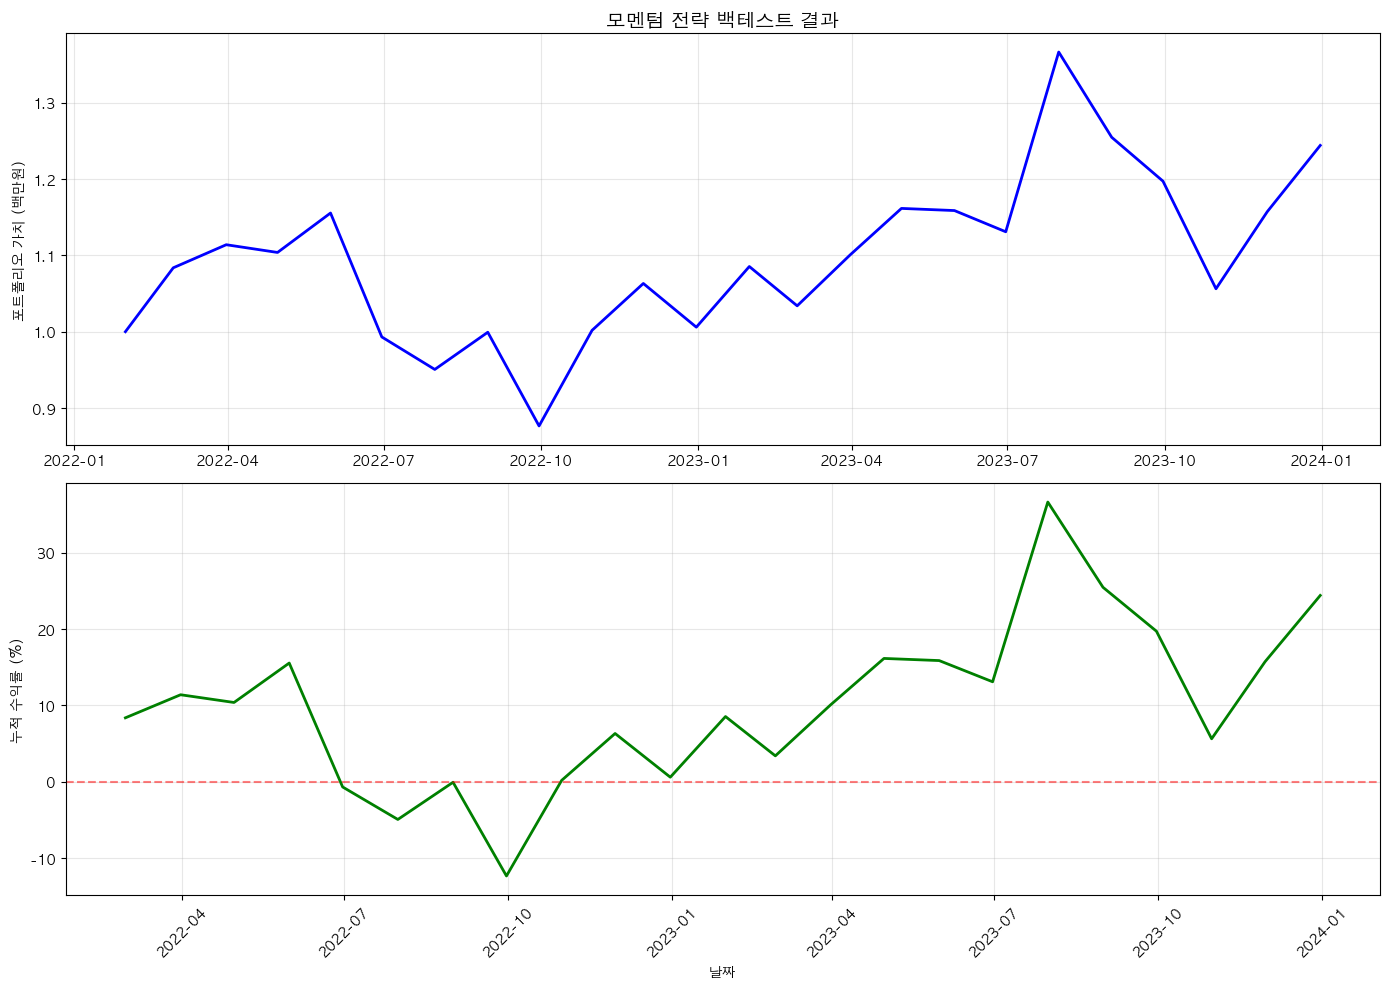


백테스트 성과 요약
초기 자본: 100만원
최종 가치: 1.24백만원
총 수익률: 24.41%
테스트 기간: 2022-01 ~ 2023-12


In [53]:
if len(backtest_results) > 0:
    # 수익률 계산
    backtest_results['returns'] = backtest_results['value'].pct_change()
    backtest_results['cumulative'] = (1 + backtest_results['returns']).cumprod() - 1
    
    # 시각화
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # 포트폴리오 가치
    ax1.plot(backtest_results['date'], backtest_results['value']/1000000, 
             color='blue', linewidth=2)
    ax1.set_ylabel('포트폴리오 가치 (백만원)')
    ax1.set_title('모멘텀 전략 백테스트 결과', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # 누적 수익률
    ax2.plot(backtest_results['date'], backtest_results['cumulative']*100, 
             color='green', linewidth=2)
    ax2.set_ylabel('누적 수익률 (%)')
    ax2.set_xlabel('날짜')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 성과 요약
    total_return = (backtest_results['value'].iloc[-1] / backtest_results['value'].iloc[0] - 1) * 100
    
    print("\n백테스트 성과 요약")
    print("=" * 40)
    print(f"초기 자본: 100만원")
    print(f"최종 가치: {backtest_results['value'].iloc[-1]/1000000:.2f}백만원")
    print(f"총 수익률: {total_return:.2f}%")
    print(f"테스트 기간: {backtest_results['date'].iloc[0].strftime('%Y-%m')} ~ {backtest_results['date'].iloc[-1].strftime('%Y-%m')}")

## 8. 실습 마무리 - 핵심 정리

### 오늘 배운 세 가지 전략:

1. **모멘텀 전략** 
   - 12개월 수익률 상위 종목
   - 매월 리밸런싱
   - 추세 추종

2. **단타 전략**
   - RSI < 30: 매수
   - RSI > 70: 매도
   - 단기 역추세

3. **가치 전략**
   - PER/PBR 낮은 종목
   - 분기/연간 리밸런싱
   - 장기 투자

### 포트폴리오 구성 원칙:
- 분산 투자 (5~10개 종목)
- 정기적 리밸런싱
- 수수료 고려

In [54]:
# 데이터 저장 (3일차에서 사용)
momentum_portfolio.to_csv('momentum_portfolio.csv', index=False)
if len(financial_df) > 0:
    value_portfolio.to_csv('value_portfolio.csv', index=False)

# RSI 데이터 저장
latest_rsi_df = pd.DataFrame({
    '종목명': latest_rsi.index,
    'RSI': latest_rsi.values
})
latest_rsi_df.to_csv('rsi_signals.csv', index=False)

print("📁 생성된 파일:")
print("  - momentum_portfolio.csv: 모멘텀 포트폴리오")
print("  - value_portfolio.csv: 가치 포트폴리오")
print("  - rsi_signals.csv: RSI 신호")

📁 생성된 파일:
  - momentum_portfolio.csv: 모멘텀 포트폴리오
  - value_portfolio.csv: 가치 포트폴리오
  - rsi_signals.csv: RSI 신호
